In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import bilby
import pycbc
import lal
from pycbc.waveform import get_td_waveform, get_fd_waveform

In [6]:
#create a waveform generator for bilby
duration = 4.
sampling_frequency = 2048.
reference_frequency = 20.
minimum_frequency = 20.
# Fixed arguments passed into the source model
waveform_arguments = dict(waveform_approximant='SEOBNRv4HM',
                          reference_frequency=reference_frequency,
                          minimum_frequency=minimum_frequency)

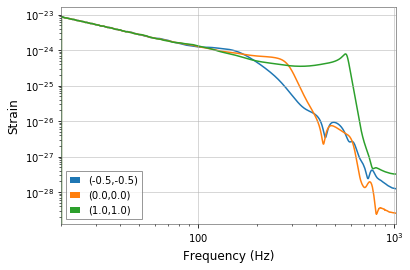

In [9]:
domega220_list=[-0.5, 0.,1.]
dtau220_list=[-0.5, 0.,1.]

plt.figure()

for (domega220, dtau220) in zip(domega220_list, dtau220_list):
    #Define injection parameters for bilby
    injection_parameters = dict(
        mass_1=36., mass_2=32., a_1=0.2, a_2=0.4, tilt_1=0., tilt_2=0.,
        phi_12=0., phi_jl=0., luminosity_distance=4000., theta_jn=0.4, psi=2.659,
        phase= 1.3 + np.pi/2., geocent_time=1126259642.413, ra=1.375, dec=0.2108,
        domega220=domega220, dtau220=dtau220)
    
    # Create the waveform_generator using a LAL BinaryBlackHole source function
    waveform_generator = bilby.gw.WaveformGenerator(
        duration=duration, sampling_frequency=sampling_frequency,
        frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
        waveform_arguments=waveform_arguments)
    
    
    start_time = injection_parameters['geocent_time'] + 2 - duration

    #transform bilby parameters to pycbc
    iota, spin_1x, spin_1y, spin_1z, spin_2x, spin_2y, spin_2z = bilby.gw.conversion.bilby_to_lalsimulation_spins(
            theta_jn=injection_parameters['theta_jn'],
            phi_jl=injection_parameters['phi_jl'],
            tilt_1=injection_parameters['tilt_1'],
            tilt_2=injection_parameters['tilt_2'],
            phi_12=injection_parameters['phi_12'],
            a_1=injection_parameters['a_1'],
            a_2=injection_parameters['a_2'],
            mass_1=injection_parameters['mass_1'],
            mass_2=injection_parameters['mass_2'],
            reference_frequency=reference_frequency, phase = injection_parameters['phase'])

    strain = waveform_generator.frequency_domain_strain(parameters=injection_parameters)
    
    #plot the waveforms
    plt.loglog(waveform_generator.frequency_array, abs(strain['plus']), label = '(%.1f,%.1f)'%(domega220, dtau220))
    plt.ylabel('Strain')
    plt.xlabel('Frequency (Hz)')
    plt.legend()
    plt.xlim([20,1024])
    
plt.show()    